In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import tools
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device is {device}')


from torchvision.models import resnet18
model = tools.model_modify(resnet18(pretrained=True),2)
model = model.to(device)

device is cuda:0


e:\Anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\Anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
epochs = 2
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
creterion = nn.CrossEntropyLoss()
batch_size = 10
save_path = './'

trainloader = tools.get_loader('../data1/data_train',batch_size)
testloader = tools.get_loader('../data1/data_test',batch_size)

losses = []
accuracies = []
precisions = []
recalls = []
F1_scores = []
turns = 0

epoch 0:
turns:99, loss:0.008196567185223103
turns:199, loss:0.05219338461756706
turns:299, loss:0.030156981199979782
turns:399, loss:0.039038870483636856
turns:499, loss:0.0006472874665632844
turns:599, loss:0.020684655755758286
turns:699, loss:0.05101029947400093
turns:799, loss:0.007154862396419048
turns:899, loss:0.0008384555694647133
turns:999, loss:0.07425545156002045
turns:1099, loss:0.024219650775194168
epoch 1:
turns:1211, loss:0.011502248235046864
turns:1311, loss:0.08196502178907394
turns:1411, loss:0.0006537640001624823
turns:1511, loss:0.00407742615789175
turns:1611, loss:0.0012929280055686831
turns:1711, loss:0.011700304225087166
turns:1811, loss:0.026910031214356422
turns:1911, loss:0.008228634484112263
turns:2011, loss:0.01794334128499031
turns:2111, loss:0.002361913211643696
turns:2211, loss:0.0012538422597572207


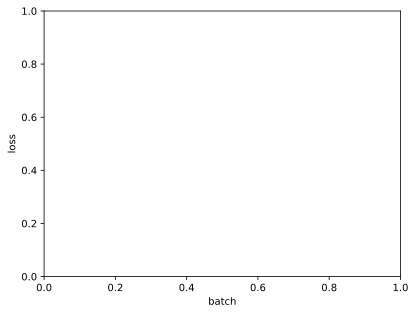

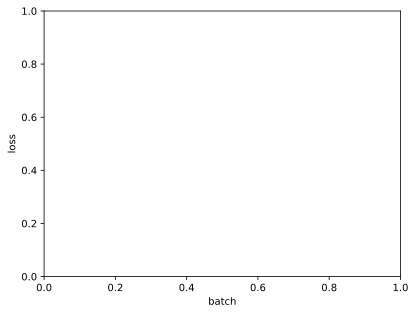

In [4]:
for epoch in range(epochs):
    print('epoch {}:'.format(epoch))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('batch')
    ax.set_ylabel('loss')
    for i,(x, y) in enumerate(trainloader):
        inputs = x.to(device)
        labels = y.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = creterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if (i+1)%100==0:
            print(f'turns:{i}, loss:{loss.item()}')
        
        with torch.no_grad():
            turns += 1
            _, predicted = torch.max(outputs.cpu(), dim=1)
            labels = labels.cpu()
            tp = torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
            tn = torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
            fp = torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
            fn = torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
            accuracy = (tp+tn)/(tp+tn+fp+fn)
            precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
            recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            F1_scores.append((2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0)
            
    #ax.plot(list(range(1,i+1+1)),losses)
    #plt.savefig('epoch{}'.format(epoch))

In [15]:
model.eval()
tp,tn,fp,fn = 0,0,0,0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.cpu(), dim=1)
        labels = labels.cpu()
        tp += torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
        tn += torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
        fp += torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
        fn += torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
print(f'测试集准确率: {100*accuracy}%')
print(f'测试集精确率: {100*precision}%')
print(f'测试集召回率: {100*recall}%')
print(f'测试集F1值: {(2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0}')

测试集准确率: 95.86447433981067%
测试集精确率: 99.24812030075188%
测试集召回率: 92.4%
测试集F1值: 0.9570170895908855


In [7]:
torch.save(model.state_dict(),'model_on_data1/model1.pth')

In [10]:
len(losses)

2224

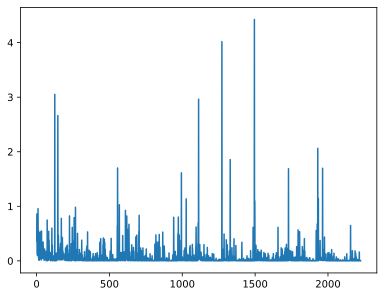

In [13]:
plt.plot(range(1,len(losses)+1), losses)

In [14]:
plt.savefig('model_on_data1/loss.png')

<Figure size 640x480 with 0 Axes>

In [18]:
testloader = tools.get_loader('../data2/data_test',batch_size)
model.eval()
tp,tn,fp,fn = 0,0,0,0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.cpu(), dim=1)
        labels = labels.cpu()
        tp += torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
        tn += torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
        fp += torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
        fn += torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
print(f'测试集准确率: {100*accuracy}%')
print(f'测试集精确率: {100*precision}%')
print(f'测试集召回率: {100*recall}%')
print(f'测试集F1值: {(2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0}')

测试集准确率: 89.37437934458788%
测试集精确率: 99.55863808322825%
测试集召回率: 78.95%
测试集F1值: 0.8806469604015617


In [19]:
testloader = tools.get_loader('../data3/data_test',batch_size)
model.eval()
tp,tn,fp,fn = 0,0,0,0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.cpu(), dim=1)
        labels = labels.cpu()
        tp += torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
        tn += torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
        fp += torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
        fn += torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
print(f'测试集准确率: {100*accuracy}%')
print(f'测试集精确率: {100*precision}%')
print(f'测试集召回率: {100*recall}%')
print(f'测试集F1值: {(2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0}%')

测试集准确率: 58.830754114468185%
测试集精确率: 99.7289972899729%
测试集召回率: 18.012726382770435%
测试集F1值: 0.30514096185737977


In [2]:
import torch
from torchvision.models import resnet18
import tools
model = tools.model_modify(resnet18(weights = True),2)

e:\Anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
model.load_state_dict(torch.load('model_on_data1/model1.pth'))
testloader = tools.get_loader('../data3/data_test/',batch_size=10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28688\3136541000.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_on_data1/model1.pth')

In [12]:
def test_model(model,loader,device):
    model.eval()
    model = model.to(device)
    tp,tn,fp,fn = 0,0,0,0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs.to(device))
            _, predicted = torch.max(outputs.cpu(), dim=1)
            labels = labels.cpu()
            tp += torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
            tn += torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
            fp += torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
            fn += torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
    recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
    print(f'测试集准确率: {100*accuracy}%') 
    print(f'测试集精确率: {100*precision}%')
    print(f'测试集召回率: {100*recall}%')
    print(f'测试集F1值: {(2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0}')
    

In [13]:
device = 'cpu'
device = 'cuda:0'

In [14]:
test_model(model,testloader,device)

测试集准确率: 58.5605502333579%
测试集精确率: 98.63387978142076%
测试集召回率: 17.670093000489477%
测试集F1值: 0.29970942299709424%


In [22]:
def train(epoch,model,device,trainloader,optimizer,creterion,save_path):
    for epoch in range(epochs):
        print('epoch {}:'.format(epoch))
        for i,(x, y) in enumerate(trainloader):
            inputs = x.to(device)
            labels = y.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = creterion(outputs, labels)
            loss.backward()
            optimizer.step()
            if (i+1)%100==0:
                print(f'batch:{i+1}, loss:{loss.item()}')
        
    torch.save(model.state_dict(),save_path)
    #ax.plot(list(range(1,i+1+1)),losses)
    #plt.savefig('epoch{}'.format(epoch))

In [23]:
epochs = 2
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
creterion = torch.nn.CrossEntropyLoss()
batch_size = 10
save_path = 'model4/model4.pth'
trainloader = tools.get_loader('../data1/data_train',batch_size)
train(epochs,model,device,trainloader,optimizer,creterion,save_path)

epoch 0:
batch:100, loss:0.019151149317622185
batch:200, loss:0.002460488583892584
batch:300, loss:0.0010666910093277693
batch:400, loss:1.8358061879553134e-06
batch:500, loss:8.344635489265784e-07
batch:600, loss:0.00013049677363596857
batch:700, loss:1.4781890058657154e-06
batch:800, loss:0.00162549689412117
batch:900, loss:1.488849193265196e-05
batch:1000, loss:6.876145926071331e-05
batch:1100, loss:0.00014772091526538134
epoch 1:
batch:100, loss:0.000508721568621695
batch:200, loss:0.0001207845052704215
batch:300, loss:0.0012828184990212321
batch:400, loss:0.012656976468861103
batch:500, loss:0.0004344722256064415
batch:600, loss:1.192092824453539e-08
batch:700, loss:1.0036988896899857e-05
batch:800, loss:5.960463766996327e-08
batch:900, loss:0.0009587407112121582
batch:1000, loss:0.021062029525637627
batch:1100, loss:4.776881542056799e-05


In [24]:
test_model(model,testloader,device)

测试集准确率: 54.80225988700565%
测试集精确率: 98.56459330143541%
测试集召回率: 10.083210964268233%
测试集F1值: 0.18294849023090587%


In [26]:
a = tools.data_pro()
vars(a)

{'last_idx': 0}